In [2]:
#!unzip "/content/drive/MyDrive/Dog Breed Identification/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Breed Identification"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# End-to-end multi class dog breed identification

An end-to- multi class image classifier using Tenserflow 2.0 and Tenserflow Hub

In [6]:
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.6.0


In [7]:
import tensorflow_hub as hub
print("TensorflowHub Version: ", hub.__version__)

#Checking GPU availability
print("GPU is available") if tf.config.list_physical_devices("GPU") else "GPU not available"

TensorflowHub Version:  0.12.0
GPU is available


## Getting data ready i.e converting images into tensors


In [8]:
import pandas as pd

labels = pd.read_csv("/content/drive/MyDrive/Dog Breed Identification/labels.csv")
print(labels.describe())
labels.head()


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     96e02cc2cf7e3327f3cf1bf3eea1640d  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

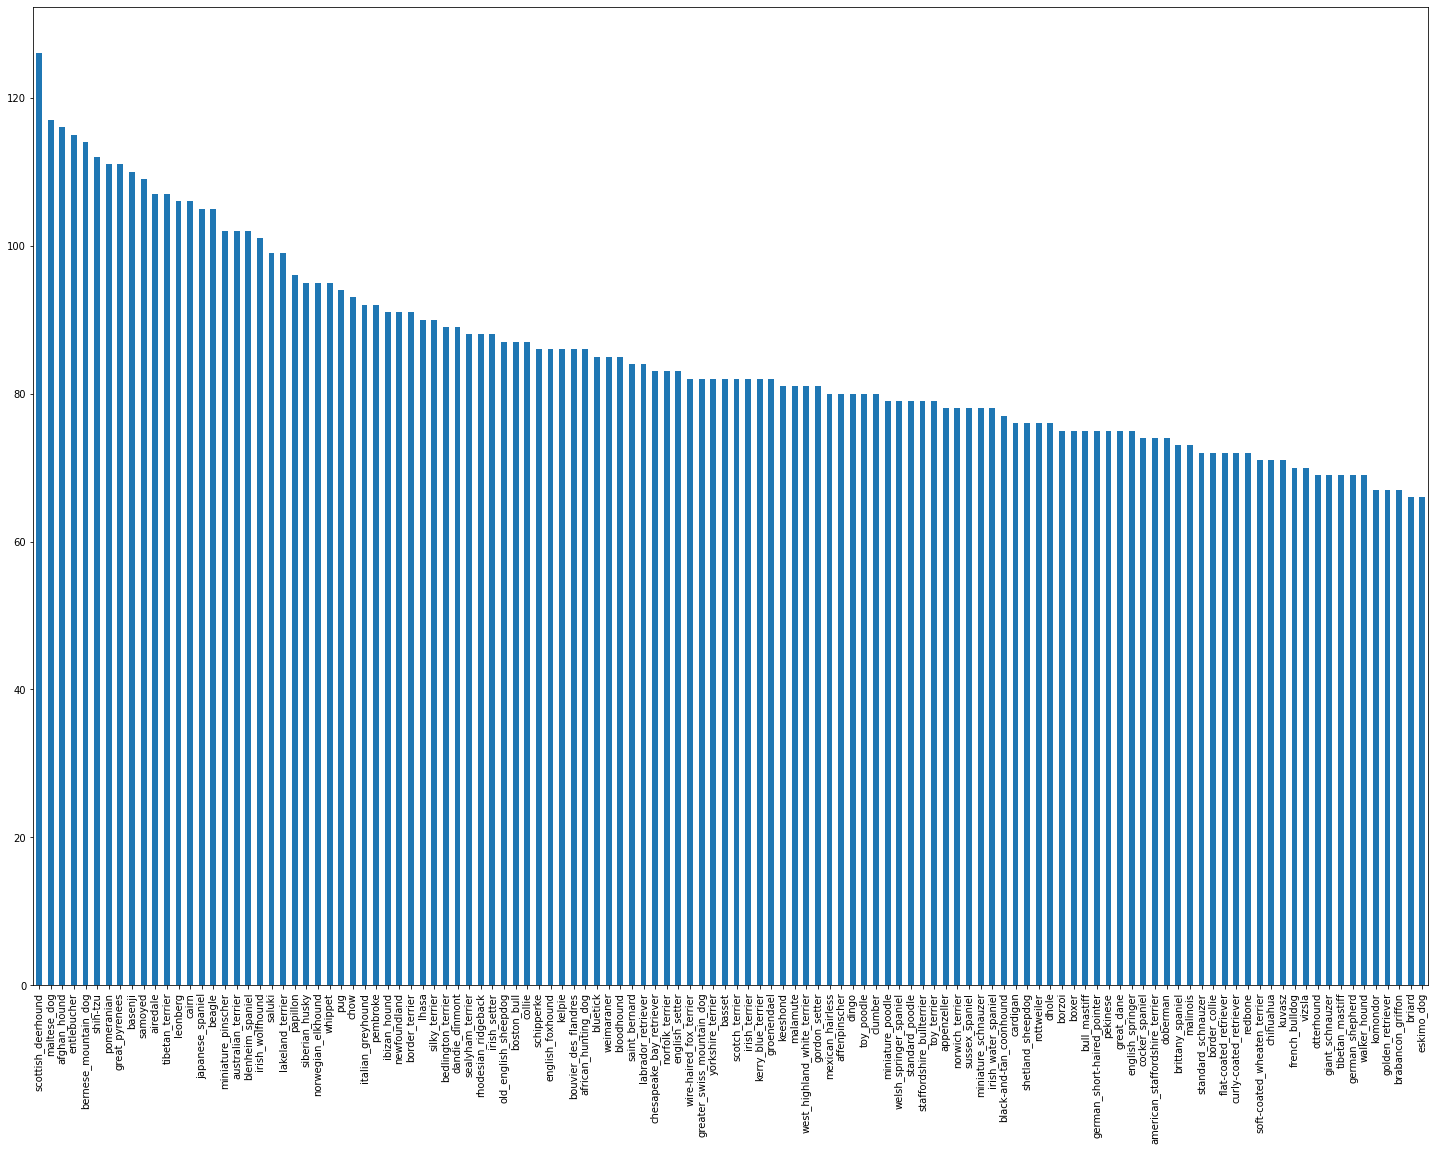

In [9]:
#Checking number of images of each dog breed
labels["breed"].value_counts().plot.bar(figsize=(25,18))

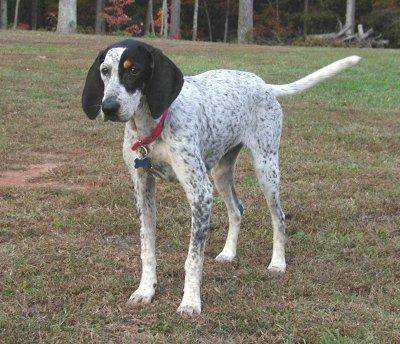

In [10]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Breed Identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

## Getting images and labels

In [11]:
#Creating pathnames from image id 
filename = ["/content/drive/MyDrive/Dog Breed Identification/train/" + fname + ".jpg" for fname in labels["id"]]
filename[:10]

['/content/drive/MyDrive/Dog Breed Identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#Checking whether no. of filenames and no. of image files in train folder are same
import os
if len(os.listdir("/content/drive/MyDrive/Dog Breed Identification/train/")) == len(filename):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


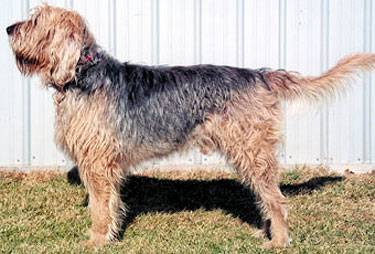

In [13]:
Image(filename[500])

In [14]:
labels["breed"][500]

'otterhound'

In [15]:
#Converting breed object type to array
import numpy as np
label_arr = labels["breed"].to_numpy()
label_arr


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(label_arr)

10222

In [17]:
#Checking whether no. of labels mathches no. of filenames i.e checking for missing data
if len(label_arr) == len(filename):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [18]:
 #Finding the unique labels
 unique_breeds = np.unique(label_arr)

In [19]:
len(unique_breeds)

120

In [20]:
#Converting a single label into boolean
print(label_arr[5])
label_arr[5] == unique_breeds

bedlington_terrier


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
boolean_labels = [label == unique_breeds for label in label_arr]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
#Converting boolean arrays into integers
print(label_arr[0]) 
print(np.where(unique_breeds == label_arr[0]))
print(boolean_labels[0].argmax()) 
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(label_arr[37])
print(boolean_labels[37].astype(int))

golden_retriever
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [25]:
x = filename
y = boolean_labels

We are going to start off with 1000 images and increase as we progress along as it would take too long to work on all 10222 images

In [26]:


# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES



1000

In [27]:
# Splitting our data into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 27)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [28]:
x_train[:3], y_train[:2]

(['/content/drive/MyDrive/Dog Breed Identification/train/040fef64640b89c53f161b6c5215b78b.jpg',
  '/content/drive/MyDrive/Dog Breed Identification/train/0e7712450813da57f7df73fc45a183b4.jpg',
  '/content/drive/MyDrive/Dog Breed Identification/train/12c65c69fa9e112448f7d26ed34abb57.jpg'],
 [array([ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

### Preprocessing Images i.e Converting images into Tensors

In [29]:
# Converting image into NumPy array
from matplotlib.pyplot import imread
image = imread(filename[37])
image.shape

(332, 500, 3)

In [30]:
# Turning image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[15, 38, 52],
        [12, 31, 45],
        [14, 28, 41],
        ...,
        [71, 42, 44],
        [70, 41, 43],
        [69, 40, 42]],

       [[11, 34, 48],
        [10, 29, 43],
        [14, 30, 43],
        ...,
        [71, 42, 44],
        [70, 41, 43],
        [69, 40, 42]]], dtype=uint8)>

In [31]:
image[:2]

array([[[15, 38, 52],
        [12, 31, 45],
        [14, 28, 41],
        ...,
        [71, 42, 44],
        [70, 41, 43],
        [69, 40, 42]],

       [[11, 34, 48],
        [10, 29, 43],
        [14, 30, 43],
        ...,
        [71, 42, 44],
        [70, 41, 43],
        [69, 40, 42]]], dtype=uint8)

In [32]:
# Defining image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [33]:
tensor = tf.io.read_file(filename[37])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01L\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [34]:
tf.image.decode_jpeg(tensor, channels=3)


<tf.Tensor: shape=(332, 500, 3), dtype=uint8, numpy=
array([[[ 14,  38,  50],
        [  9,  31,  42],
        [ 11,  28,  38],
        ...,
        [ 68,  42,  41],
        [ 67,  41,  40],
        [ 66,  40,  39]],

       [[ 10,  34,  46],
        [  8,  30,  41],
        [ 13,  30,  40],
        ...,
        [ 68,  42,  41],
        [ 67,  41,  40],
        [ 66,  40,  39]],

       [[  5,  31,  44],
        [  6,  30,  42],
        [ 15,  33,  45],
        ...,
        [ 68,  42,  41],
        [ 67,  41,  40],
        [ 66,  40,  39]],

       ...,

       [[171, 119,  97],
        [171, 119,  97],
        [172, 120,  96],
        ...,
        [183, 102,  37],
        [182, 101,  36],
        [181, 100,  35]],

       [[169, 117,  95],
        [170, 118,  96],
        [171, 119,  95],
        ...,
        [180,  99,  34],
        [179,  98,  33],
        [178,  97,  32]],

       [[168, 116,  94],
        [169, 117,  95],
        [170, 118,  94],
        ...,
        [179,  98,  3

## Converting data into batches

In [35]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [36]:
(process_image(x[37]),tf.constant(y[37]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.04078788, 0.1300736 , 0.17471646],
         [0.06911422, 0.12580189, 0.16169125],
         [0.09452   , 0.15357144, 0.18363066],
         ...,
         [0.2787465 , 0.18070728, 0.165021  ],
         [0.26999298, 0.16803218, 0.16411062],
         [0.26123947, 0.15927866, 0.1553571 ]],
 
        [[0.02544487, 0.12040286, 0.16788183],
         [0.08807461, 0.14519277, 0.1819431 ],
         [0.09595495, 0.15274768, 0.1880418 ],
         ...,
         [0.2787465 , 0.18070728, 0.165021  ],
         [0.26999298, 0.16803218, 0.16411062],
         [0.26123947, 0.15927866, 0.1553571 ]],
 
        [[0.03230605, 0.13282001, 0.18834034],
         [0.10315127, 0.17253122, 0.2139528 ],
         [0.10523616, 0.1743485 , 0.21529584],
         ...,
         [0.2787465 , 0.18070728, 0.165021  ],
         [0.26999298, 0.1688375 , 0.16249998],
         [0.26123947, 0.16008398, 0.15374646]],
 
        ...,
 
        [[0.67481905, 0.4708975 

In [37]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batch...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), 
                                              tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [38]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batch...
Creating validation data...


In [39]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches


In [40]:
import matplotlib.pyplot as plt

def show_images(images, labels):
  plt.figure(figsize=(20,20))
  for i in range(30):
      ax = plt.subplot(5, 6, i+1)
      plt.imshow(images[i])
      plt.title(unique_breeds[labels[i].argmax()])
      plt.axis("off")

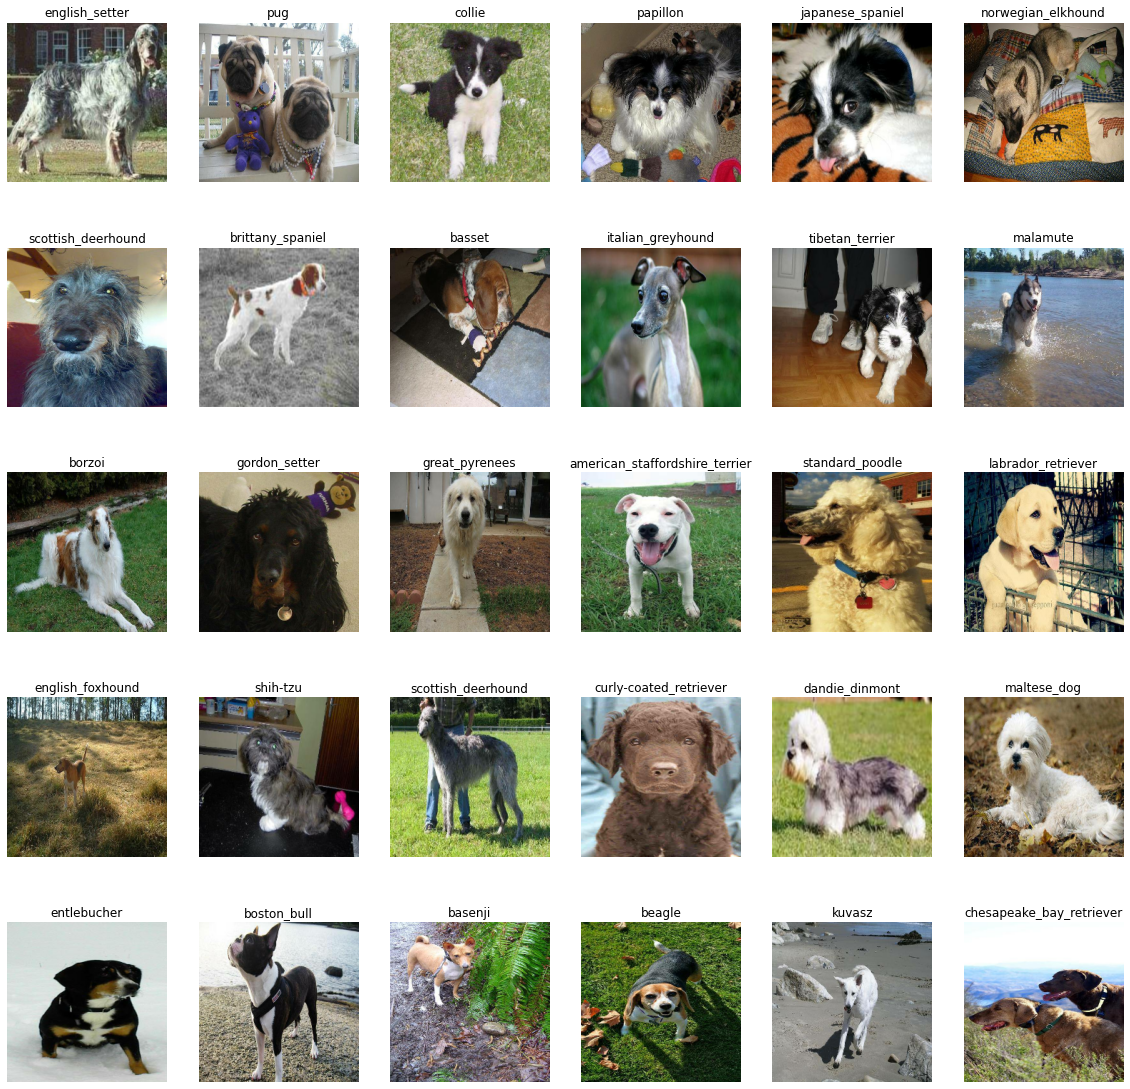

In [41]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

In [42]:
len(train_images), len(train_labels)

(32, 32)

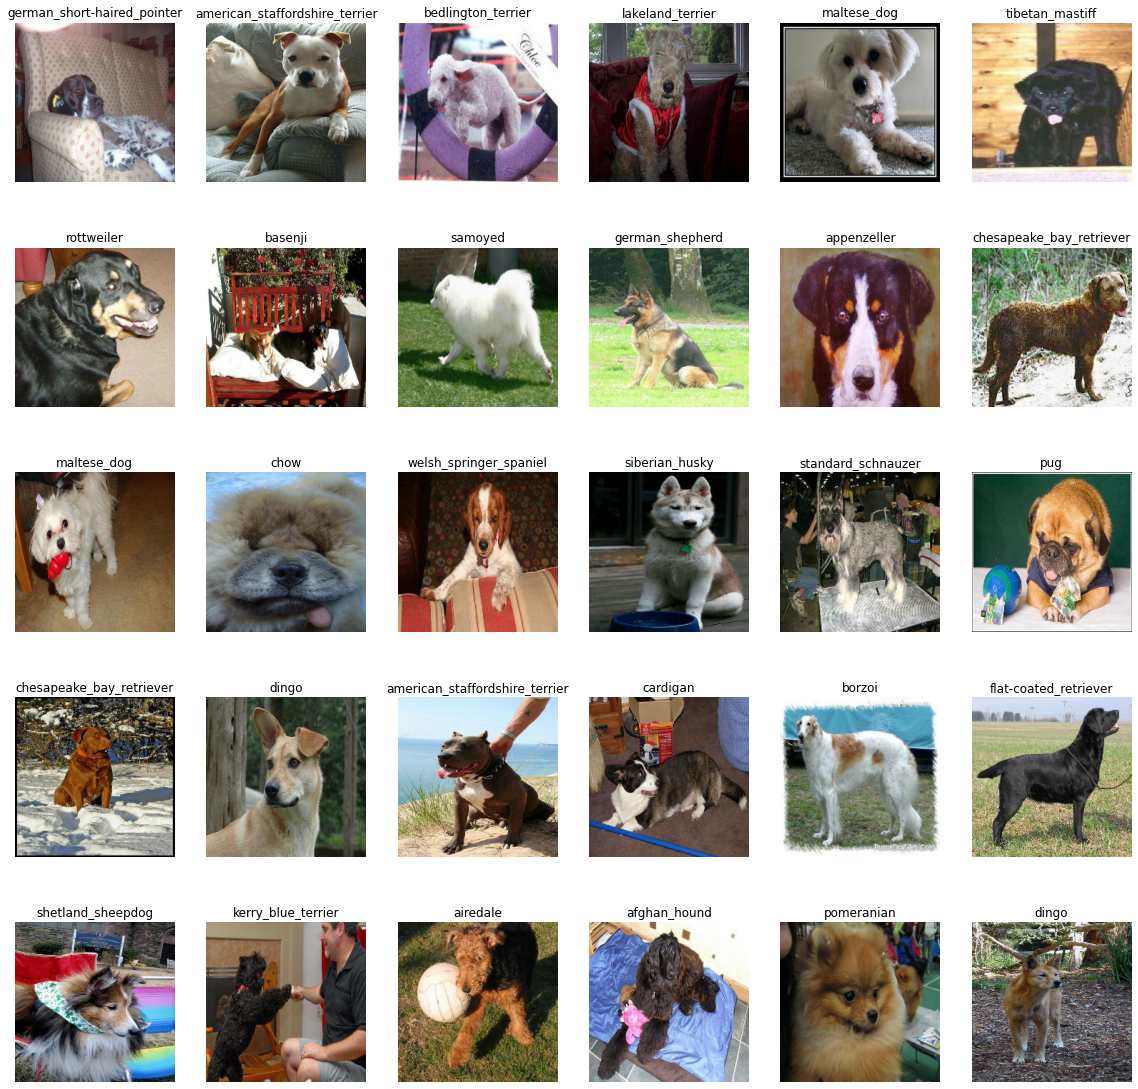

In [43]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## Building a model

In [44]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [45]:
# Creating a funtions that builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", MODEL_URL)
    model = tf.keras.Sequential([
                                 hub.KerasLayer(MODEL_URL),
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                       activation="softmax")
    ])

    model.compile(
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(), 
                    metrics=["accuracy"] 
    )
    model.build(INPUT_SHAPE)

    return model
     

In [46]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks 


In [47]:
# Loading Tensorboard notebook extension
%load_ext tensorboard

In [48]:
import datetime

def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Dog Breed Identification/Logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Preventing overfitting

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training model

In [50]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [51]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [52]:
#Creating a funtion to train the model and return the trained model
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, 
            callbacks=[tensorboard, early_stopping])
  return model


In [53]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 133s 4s/step - loss: 4.5333 - accuracy: 0.1000 - val_loss: 3.4061 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 4s 164ms/step - loss: 1.5667 - accuracy: 0.7125 - val_loss: 2.1481 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 4s 161ms/step - loss: 0.5293 - accuracy: 0.9425 - val_loss: 1.7055 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 4s 162ms/step - loss: 0.2296 - accuracy: 0.9937 - val_loss: 1.5234 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 4s 161ms/step - loss: 0.1368 - accuracy: 0.9987 - val_loss: 1.4375 - val_accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 5s 178ms/step - loss: 0.0941 - accuracy: 0.9987 - val_loss: 1.3949 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================]

In [54]:
#Checking tensorboard logs

# %tensorboard --logdir /content/drive/MyDrive/Dog\ Breed\ Identification/Logs

## Making and evaluating predictions

In [55]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 111ms/step


array([[1.2055759e-03, 4.6574241e-05, 4.0281055e-05, ..., 3.5705388e-04,
        6.5688597e-05, 4.1873569e-05],
       [7.3364662e-04, 6.4021202e-05, 1.0969038e-04, ..., 6.8553945e-04,
        4.0116167e-05, 1.6881437e-03],
       [2.2758236e-03, 9.1512375e-05, 3.8845792e-05, ..., 4.0112153e-02,
        5.7848007e-04, 9.1583101e-04],
       ...,
       [2.1159199e-04, 7.4059480e-01, 6.9179565e-05, ..., 4.7083508e-05,
        3.9977493e-04, 2.9476019e-05],
       [1.9341592e-06, 1.6136926e-06, 4.2355143e-05, ..., 7.9464799e-06,
        1.2449666e-04, 7.6727192e-06],
       [2.0040749e-03, 3.1131163e-04, 5.7716945e-05, ..., 1.4083127e-04,
        2.4426493e-04, 6.5429979e-03]], dtype=float32)

In [56]:
np.sum(predictions[7])

1.0

In [57]:
predictions.shape

(200, 120)

In [58]:
len(y_val), len(unique_breeds)

(200, 120)

In [59]:
index = 37
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}") 
print(f"Sum: {np.sum(predictions[index])}") 
print(f"Max index: {np.argmax(predictions[index])}") 
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.30813114e-05 8.85101035e-04 1.41610071e-05 1.53811598e-05
 6.89299213e-06 9.22663185e-06 1.48161359e-06 9.70258043e-06
 8.09401536e-06 4.95736549e-06 9.91708112e-06 1.25015504e-05
 3.14798763e-06 9.72871840e-06 9.44285493e-05 5.00356100e-06
 2.12084378e-05 4.23784222e-04 8.62788409e-04 3.07809273e-06
 2.83557980e-04 3.71390110e-04 4.38423012e-05 9.09092720e-04
 3.66906679e-05 3.17077199e-03 7.03134210e-05 1.43770712e-05
 1.18571836e-04 3.30190164e-06 5.44697512e-03 1.01655896e-03
 3.58735233e-05 1.13918650e-04 4.55821265e-07 7.64130891e-06
 4.12752524e-05 2.31799604e-05 6.01418742e-06 1.00109697e-04
 2.53065555e-05 9.19215927e-06 2.87254315e-05 4.35760681e-04
 6.55130953e-06 4.07683583e-05 6.22555162e-05 5.87553086e-06
 6.00344028e-05 1.34892352e-05 1.38751684e-05 4.11735236e-04
 1.36615708e-04 5.50511722e-05 5.52196172e-04 1.36693257e-06
 5.39085959e-05 2.41401858e-06 2.39217043e-05 4.23525635e-04
 8.46143303e-06 1.51508739e-05 1.96460023e-04 2.63427864e-06
 6.08060873e-06 6.190154

In [60]:
unique_breeds[69]

'leonberg'

In [61]:
#Turning prediction probabilities into their labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]



In [62]:
pred_label = get_pred_label(predictions[37])
pred_label

'leonberg'

In [63]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

### Unbatching dataset to make predictions on the validation images and then compate those predictitons to the validation set i.e the truth labels

In [64]:
def unbatch(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


In [65]:
val_images, val_labels = unbatch(val_data)
val_images[42], val_labels[42]

(array([[[0.16180418, 0.35011044, 0.06639171],
         [0.2127423 , 0.38172933, 0.1320364 ],
         [0.10304083, 0.23502614, 0.04768134],
         ...,
         [0.38257855, 0.5341196 , 0.35752764],
         [0.39549533, 0.5732968 , 0.4001256 ],
         [0.26691276, 0.46053168, 0.30323073]],
 
        [[0.21233542, 0.3715725 , 0.12266526],
         [0.14549921, 0.28557906, 0.07097761],
         [0.09161986, 0.19761774, 0.051779  ],
         ...,
         [0.43939528, 0.5757487 , 0.4429967 ],
         [0.15994176, 0.3177832 , 0.1821364 ],
         [0.28839374, 0.45915797, 0.32163966]],
 
        [[0.25501806, 0.36748305, 0.1843061 ],
         [0.18528251, 0.2812594 , 0.12721701],
         [0.1987625 , 0.26653507, 0.15782535],
         ...,
         [0.3410098 , 0.4490457 , 0.3800357 ],
         [0.31811896, 0.44253978, 0.3534271 ],
         [0.27641857, 0.41650337, 0.30338904]],
 
        ...,
 
        [[0.83604926, 0.17639168, 0.1934184 ],
         [0.8046849 , 0.19809338, 0.19047

In [66]:
#Visualizing for better understanding
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  pred_label = get_pred_label(pred_prob)
  
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

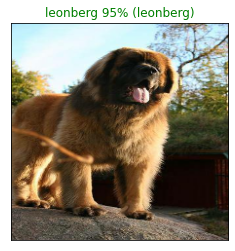

In [67]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=37)

In [68]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
 
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Finding top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Finding top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Finding top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

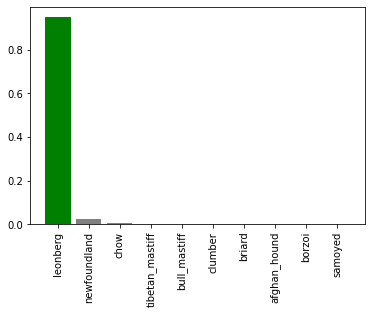

In [69]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=37)



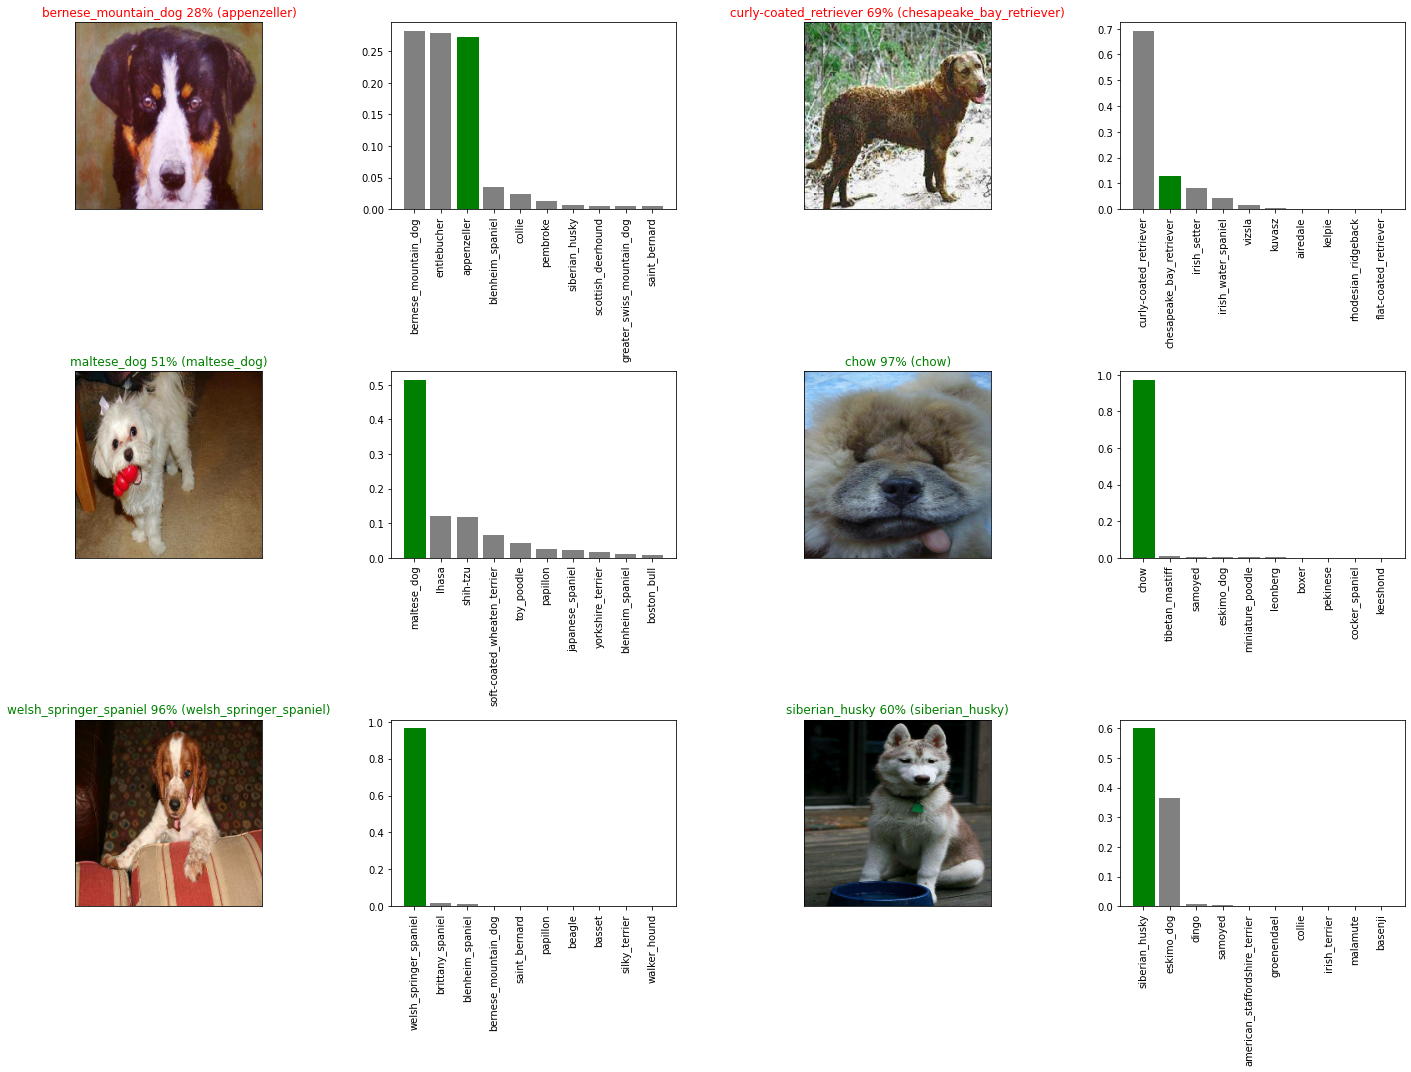

In [73]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and loading models

In [74]:
def save_model(model, suffix=None):
  modeldir = os.path.join("/content/drive/MyDrive/Dog Breed Identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" 
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [75]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [76]:
#Saving model trainde on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/Dog Breed Identification/models/20210922-10341632306865-1000-images-Adam.h5...


'/content/drive/MyDrive/Dog Breed Identification/models/20210922-10341632306865-1000-images-Adam.h5'

In [77]:
model_images_1000 = load_model("/content/drive/MyDrive/Dog Breed Identification/models/20210922-10341632306865-1000-images-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Breed Identification/models/20210922-10341632306865-1000-images-Adam.h5


In [79]:
model.evaluate(val_data), model_images_1000.evaluate(val_data)

7/7 [==============================] - 1s 106ms/step - loss: 1.2571 - accuracy: 0.6450


([1.2570935487747192, 0.6449999809265137],
 [1.2570935487747192, 0.6449999809265137])

## Training a model on the entire dataset

In [83]:
len(x_train),len(y_val)

(800, 200)

In [84]:
#Creating a data batch for the entire dataset
full_data = create_data_batches(x,y)

Creating training data batch...


In [85]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [86]:
#Creating a model
full_model = create_model()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [87]:
#Creating full model callbacks
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [88]:
#Fitting the model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1051s 3s/step - loss: 1.3266 - accuracy: 0.6749
Epoch 2/100
320/320 [==============================] - 41s 126ms/step - loss: 0.3993 - accuracy: 0.8818
Epoch 3/100
320/320 [==============================] - 40s 123ms/step - loss: 0.2358 - accuracy: 0.9338
Epoch 4/100
320/320 [==============================] - 40s 125ms/step - loss: 0.1507 - accuracy: 0.9644
Epoch 5/100
320/320 [==============================] - 40s 125ms/step - loss: 0.1044 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0764 - accuracy: 0.9878
Epoch 7/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0580 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0448 - accuracy: 0.9948
Epoch 9/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0379 - accuracy: 0.9952
Epoch 10/100
320/320 [==============================] - 41s 128ms

In [89]:
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/Dog Breed Identification/models/20210922-11471632311266-all-images-Adam.h5...


'/content/drive/MyDrive/Dog Breed Identification/models/20210922-11471632311266-all-images-Adam.h5'

In [110]:
load_full_model = load_model("/content/drive/MyDrive/Dog Breed Identification/models/20210922-11471632311266-all-images-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Breed Identification/models/20210922-11471632311266-all-images-Adam.h5


In [112]:
#Making predictions on the test dataset
#Loading test image
test_path = "/content/drive/MyDrive/Dog Breed Identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]


In [113]:
test_filenames[:3]

['/content/drive/MyDrive/Dog Breed Identification/test/dd1101676d8c7fa8522dd5ebd1129d17.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/test/dea92807aa2ac37bbc2dabf1b0eb6a39.jpg',
 '/content/drive/MyDrive/Dog Breed Identification/test/dcae38083c0e6a8afe15b6f0703bdefa.jpg']

In [114]:
len(test_filenames)

10357

In [115]:
#Create data batches
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data...


In [116]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [117]:
test_predictions = load_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 1204s 4s/step


In [120]:
np.savetxt("/content/drive/MyDrive/Dog Breed Identification/pred_array.csv", test_predictions, delimiter=",")

In [121]:
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog Breed Identification/pred_array.csv",delimiter=",")

In [123]:
test_predictions[:2]

array([[2.15083134e-08, 1.82451024e-15, 1.11061842e-14, 1.61480648e-10,
        3.90387240e-13, 5.60695048e-16, 1.02836161e-14, 1.19948799e-12,
        2.11779661e-12, 2.96116747e-15, 1.45430938e-16, 3.18076457e-13,
        6.18255370e-17, 5.11878625e-13, 1.15031912e-13, 3.29831995e-12,
        1.62191292e-13, 1.26852630e-13, 2.90968953e-17, 3.61127095e-05,
        1.30521280e-11, 8.33105668e-11, 2.22266337e-07, 7.69848499e-16,
        6.15161442e-18, 4.52145738e-10, 3.58898898e-16, 6.21255061e-11,
        5.50763157e-13, 2.31562218e-08, 7.49705797e-10, 1.56490158e-16,
        2.75143153e-09, 1.69931430e-11, 3.75183010e-11, 3.12019410e-10,
        2.53484800e-17, 1.16748008e-14, 4.09286574e-15, 1.48867787e-16,
        5.13060406e-13, 1.25988872e-10, 3.57306632e-13, 2.86067251e-15,
        1.49752728e-11, 1.02523963e-07, 6.92079553e-12, 8.34349611e-14,
        3.09329021e-11, 1.27442600e-18, 3.40604717e-15, 4.41078245e-14,
        5.59146820e-15, 3.37017415e-12, 9.75224276e-11, 2.098192

In [125]:
test_predictions.shape

(10357, 120)

## Making predictions on images I randomly collected

In [128]:
custom_path = "/content/drive/MyDrive/Dog Breed Identification/Dog Images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [129]:
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data...


In [131]:
custom_preds = load_full_model.predict(custom_data)

In [132]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['chow', 'german_shepherd', 'leonberg', 'siberian_husky']

In [133]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

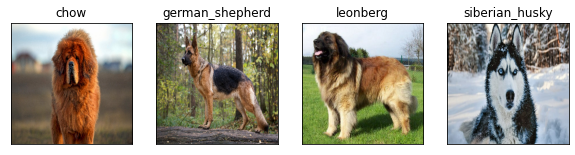

In [135]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

Here the model got 3 of the 4 images right except for the first that says chow whereas the breed actually is tibetan mastiff.